### Author: Seth Cram
### Class: CS474 - Deep Learning
### Homewoke 1: Sigmoid, KL and cross-entropy

Add your code to the following sections:

```python
    # (1) add your code here
    #-----------------------

    #---------------------------------
```


Grading details:
1. sigm. 20 pts. 
Students can use both the math.exp and np.exp functions. Give 5 extra points to students who can solve the overflow warning.
    
2. dsigm. 20 pts

3. show the sigm and dsigm curves. 10pts

4. kl.  20 pts
Student should consider zero values in p and/or q. If not, reduce 5 points.

4. cross-entropy. 30 pts
students should take care of zeros in q, e.g., using np.clip(). If not reduce 5 points.


### Common issues:
1. Overflow warning of the np.exp(-x) function
2. Didn't deal with 0 in KL divergence
3. Didn't deal with 0 in cross-entropy

sigmoid(0): 0.5
sigmoid(10^(6)): 1.0
sigmoid(-10^(6)): 0.0
derivative of sigmoid(0): 0.25
derivative of sigmoid(10^(6)): 0.0
derivative of sigmoid(-10^(6)): 0.0


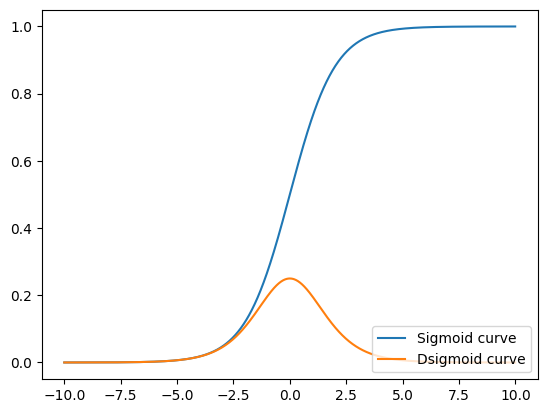

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

def sigm(x):
    """The logistic sigmoid function
    
    Parameters
    ----------
    x: 1D numpy arrays
    """  
    
    # (1) add your code here 
    #sigm should be able to deal with scalars and vectors
    #-----------------------
 
    #try calc number
    try:
        #determine type of input
        typeOfX = type(x)
        
        #if iterable type
        if(typeOfX in [np.ndarray, list, tuple, set, bytes, bytearray, np.array]):
            #cache length of input
            xLength = len(x)
            
            #alloc required new arr space
            y = np.zeros(x.shape)
    
            #walk thru input arr ellys
            for elementIndex in range(xLength):
                y[elementIndex] = 1/(1+math.exp(-x[elementIndex]))
            return y
        #if single value
        elif(typeOfX in [int, float]):
            #calc outright
            return 1/(1+math.exp(-x))
    
    #if overflow error encountered
    except OverflowError:
        #round answer to zero
        return 0.0
    
    #---------------------------------

def dsigm(x):
    """The derivative of the logistic sigmoid function
    
    Parameters
    ----------
    x: 1D numpy arrays   
    """ 
    
    # (2) add your code here
    #dsigm should be able to deal with scalars and vectors
    #-------------------------------
 
    return sigm(x) * (1-sigm(x))

    #------------------------------
    
print('sigmoid(0):', sigm(0))
print('sigmoid(10^(6)):', sigm(1e6))
print('sigmoid(-10^(6)):', sigm(-1e6))

print('derivative of sigmoid(0):', dsigm(0))
print('derivative of sigmoid(10^(6)):', dsigm(1e6))
print('derivative of sigmoid(-10^(6)):', dsigm(-1e6))

# (3) add your code here
# show the curves of the sigm and dsigm functions using plt.plot() function
# from -10 to 10
#-----------------------
x = np.arange(-10, 10, 0.01)
y = sigm(x)
y1 = dsigm(x)

plt.plot(x, y, label="Sigmoid curve")
plt.plot(x, y1, label="Dsigmoid curve")
plt.legend(loc="lower right")
plt.show()

#-----------------------

In [4]:
# KL divergience
def KL(p, q):
    
    """KL divergence D(P || Q)
    
    Parameters
    ----------
    p, q : 1D numpy arrays of discrete probability distributions
    
    """
    
    # (4) add your code here
    #Avoid the division-by-zero problem
    #-----------------------
    
    #cache arr lengths
    pLength = len(p)
    qLength = len(q)
    
    #ensure arr lengths are the same
    assert pLength == qLength
    
    #start resultant sum at zero
    y = 0
    
    #walk thru p arr
    for i in range(pLength):
        #cache curr q, p ellys
        qCurrElly = q[i]
        pCurrElly = p[i]
        
        #if curr q elly isn't zero
        if(qCurrElly != 0):
            #calc rslt using function
            y += pCurrElly * np.log(pCurrElly/qCurrElly)
    
    
    return y
    
    #-----------------------

# test code
p = np.array([0.2, 0.8, 0])
q = np.array([0.1, 0.9, 0])

print(KL(p, q), KL(q, p))

0.04440300758688234 0.036690014034750584


In [61]:
# Cross-entropy
def crossentropy(p, q):
    """The Cross-entropy H(P, Q)
    
    Parameters
    ----------
    p, q : 1D numpy arrays of discrete probability distributions
    
    """  
    
    # (4) add your code here
    # students should take care of zeros in q 
    #-----------------------

    #cache arr lengths
    pLength = len(p)
    qLength = len(q)
    
    #ensure arr lengths are the same
    assert pLength == qLength
    
    #start resultant sum at zero
    y = 0
    
    #clip the input min to just above 0 and max to 1
    np.clip(q, 0.000000000001, 1, out=q)

    #walk thru p arr
    for i in range(pLength):
        y -= p[i] * np.log(q[i])

    return y

    #-----------------------
    
# test code
p = np.array([0.2, 0.7, 0.1, 0])
q = np.array([0.1, 0.9, 0, 0.1])
print(crossentropy(p, q), crossentropy(q, p))    

3.2973714911521426 3.245053352383427
